In [1]:
import pandas as pd

CSV = './brickset2017.csv'
lego_df = pd.read_csv(CSV,dtype={'Number': 'object'})
lego_df.head(2)

,SetID,Number,Variant,Theme,Subtheme,Year,Name,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,ImageURL,OwnedBy,WantedBy
0,26649,10255,1,Advanced Models,Modular Buildings,2017,Assembly Square,9.0,4002.0,179.99,279.99,339.99,239.99,https://images.brickset.com/sets/images/10255-...,8239,5444.0
1,27618,10256,1,Advanced Models,Buildings,2017,Taj Mahal,NaN,5923.0,299.99,369.99,449.99,329.99,https://images.brickset.com/sets/images/10256-...,1365,1546.0


In [2]:
print("df = degree of freedom")

df = degree of freedom


In [3]:
print('dropna 実行前：', len(lego_df))
lego_df.isnull().sum()

dropna 実行前： 836


SetID         0
Number        0
Variant       0
Theme         0
Subtheme    150
Year          0
Name          0
Minifigs    428
Pieces      295
UKPrice     345
USPrice     272
CAPrice     357
EUPrice     353
ImageURL      0
OwnedBy       0
WantedBy      9
dtype: int64

In [4]:
lego_df.dropna(subset=['Number','USPrice','Pieces'],inplace=True)

print('dropna 実行後',len(lego_df))

lego_df.isnull().sum()


dropna 実行後 430


SetID         0
Number        0
Variant       0
Theme         0
Subtheme    114
Year          0
Name          0
Minifigs     87
Pieces        0
UKPrice      44
USPrice       0
CAPrice      72
EUPrice      47
ImageURL      0
OwnedBy       0
WantedBy      0
dtype: int64

In [5]:
lego_df.set_index('Number',inplace=True)
lego_df.head(2)

,SetID,Variant,Theme,Subtheme,Year,Name,Minifigs,Pieces,UKPrice,USPrice,CAPrice,EUPrice,ImageURL,OwnedBy,WantedBy
Number,,,,,,,,,,,,,,,
10255,26649,1,Advanced Models,Modular Buildings,2017,Assembly Square,9.0,4002.0,179.99,279.99,339.99,239.99,https://images.brickset.com/sets/images/10255-...,8239,5444.0
10256,27618,1,Advanced Models,Buildings,2017,Taj Mahal,NaN,5923.0,299.99,369.99,449.99,329.99,https://images.brickset.com/sets/images/10256-...,1365,1546.0


In [6]:
colums = ['Theme', 'Subtheme', 'Year', 'Name', 'Minifigs', 'Pieces', 'USPrice', 'OwnedBy', 'WantedBy']
lego_df = lego_df[colums]
lego_df.head()

,Theme,Subtheme,Year,Name,Minifigs,Pieces,USPrice,OwnedBy,WantedBy
Number,,,,,,,,,
10255,Advanced Models,Modular Buildings,2017,Assembly Square,9.0,4002.0,279.99,8239,5444.0
10256,Advanced Models,Buildings,2017,Taj Mahal,NaN,5923.0,369.99,1365,1546.0
10257,Advanced Models,Fairground,2017,Carousel,7.0,2670.0,199.99,3743,2951.0
10258,Advanced Models,Vehicles,2017,London Bus,NaN,1686.0,139.99,3829,2366.0
10259,Advanced Models,Winter Village,2017,Winter Village Station,5.0,902.0,79.99,5445,1941.0


In [7]:
lego_df.describe().round(1)

,Year,Minifigs,Pieces,USPrice,OwnedBy,WantedBy
count,430.0,343.0,430.0,430.0,430.0,430.0
mean,2017.0,2.9,376.8,39.4,2386.7,761.0
std,0.0,2.2,688.4,59.9,1762.6,632.8
min,2017.0,1.0,4.0,4.0,28.0,21.0
25%,2017.0,1.0,72.2,10.0,977.8,363.0
50%,2017.0,2.0,174.5,20.0,1975.5,571.0
75%,2017.0,4.0,396.8,50.0,3466.5,986.2
max,2017.0,19.0,7541.0,800.0,9871.0,5444.0


In [8]:
lego_df['UnitPrice'] = round(lego_df['USPrice'] / lego_df['Pieces'], 4)
lego_df[['Pieces', 'USPrice', 'UnitPrice']].head(3)

,Pieces,USPrice,UnitPrice
Number,,,
10255,4002.0,279.99,0.0700
10256,5923.0,369.99,0.0625
10257,2670.0,199.99,0.0749


In [9]:
lego_df.describe().round(1)

,Year,Minifigs,Pieces,USPrice,OwnedBy,WantedBy,UnitPrice
count,430.0,343.0,430.0,430.0,430.0,430.0,430.0
mean,2017.0,2.9,376.8,39.4,2386.7,761.0,0.2
std,0.0,2.2,688.4,59.9,1762.6,632.8,0.2
min,2017.0,1.0,4.0,4.0,28.0,21.0,0.0
25%,2017.0,1.0,72.2,10.0,977.8,363.0,0.1
50%,2017.0,2.0,174.5,20.0,1975.5,571.0,0.1
75%,2017.0,4.0,396.8,50.0,3466.5,986.2,0.2
max,2017.0,19.0,7541.0,800.0,9871.0,5444.0,1.5


In [10]:
count_theme = lego_df.groupby('Theme')['Theme'].count()
count_theme.sort_values(ascending=False).head()

Theme
Collectable Minifigures    56
Star Wars                  45
City                       38
Friends                    30
Nexo Knights               23
Name: Theme, dtype: int64

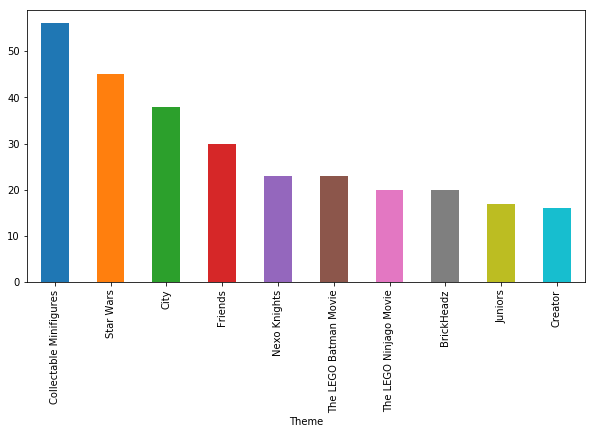

In [11]:
%matplotlib inline
theme_ranking10 = count_theme.sort_values(ascending=False).head(10)
theme_ranking10.plot.bar(figsize=(10,5))

In [12]:
lego_df.dtypes

Theme         object
Subtheme      object
Year           int64
Name          object
Minifigs     float64
Pieces       float64
USPrice      float64
OwnedBy        int64
WantedBy     float64
UnitPrice    float64
dtype: object

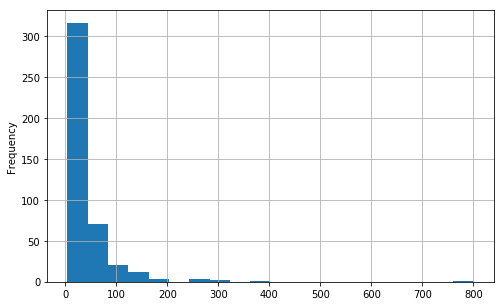

In [13]:
lego_df['USPrice'].plot.hist(bins=20, grid=True, figsize=(8,5))

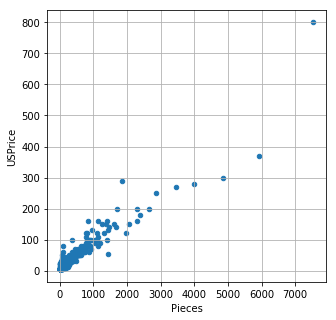

In [14]:
lego_df.plot.scatter(x='Pieces', y='USPrice', grid=True, figsize=(5, 5))

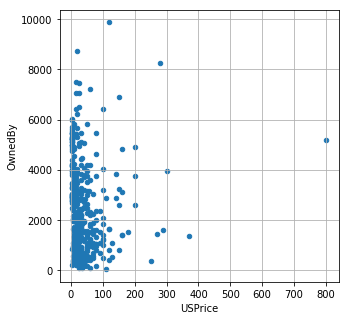

In [15]:
lego_df.plot.scatter(x='USPrice', y='OwnedBy', grid=True, figsize=(5, 5))

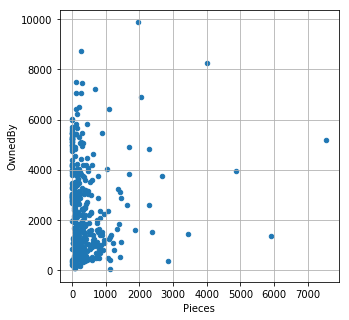

In [16]:
lego_df.plot.scatter(x='Pieces', y='OwnedBy', grid=True, figsize=(5, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1256f0908>,
      dtype=object)

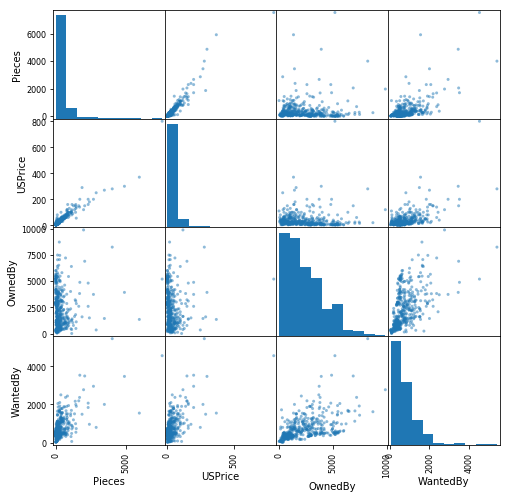

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(lego_df[['Pieces','USPrice','OwnedBy','WantedBy']],figsize=(8,8))

In [18]:
lego_df[['Minifigs','Pieces','USPrice','OwnedBy','WantedBy']].corr().round(4) # corr():相関係数

,Minifigs,Pieces,USPrice,OwnedBy,WantedBy
Minifigs,1.0000,0.6502,0.6200,-0.0254,0.5268
Pieces,0.6502,1.0000,0.9506,0.0584,0.6459
USPrice,0.6200,0.9506,1.0000,0.0037,0.6284
OwnedBy,-0.0254,0.0584,0.0037,1.0000,0.5212
WantedBy,0.5268,0.6459,0.6284,0.5212,1.0000


In [19]:
from scipy.stats import pearsonr, linregress

pearsonr(lego_df['Pieces'], lego_df['USPrice'])

(0.9505699097927602, 1.6466387637334317e-219)

In [20]:
linregress(lego_df['Pieces'], lego_df['USPrice'])

LinregressResult(slope=0.08277760657698045, intercept=8.206959865658622, rvalue=0.9505699097927596, pvalue=1.646638763738088e-219, stderr=0.0013070234503002633)

In [21]:
slope, intercept, rvalue, pvalue, stderr = linregress(lego_df['Pieces'],lego_df['USPrice'])

pieces = 500

# Y = aX + b
price = slope * pieces + intercept
round(price)

50.0

In [22]:
# 回帰式取得
SLOPE, INTERCEPT, rvalue, pvalue, stderr = linregress(lego_df['Pieces'],lego_df['USPrice'])

# ピース数から価格を返す関数
def get_price(pieces):
    return pieces * SLOPE + INTERCEPT

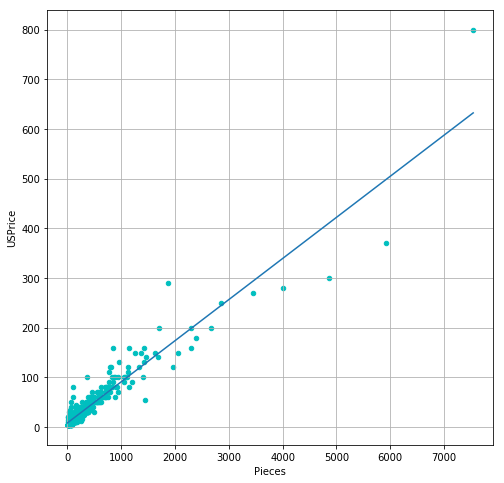

In [23]:
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(8, 8))
ax1 = figure.add_subplot(1,1,1) # 1 x 1　の　1つ目に配置
lego_df.plot.scatter(ax=ax1, x='Pieces', y='USPrice', grid=True, color='c')

max_pieace = lego_df['Pieces'].max()

x = [0, max_pieace]
y = [get_price(0), get_price(max_pieace)]

ax1.plot(x, y)
plt.show()